# Aplicaciones de la simulación

Dada una secuencia de 6 números enteros y un séptimo valor (también entero) como objetivo, el problema consiste en obtener una secuencia de operadores aritméticos (+, −, ×, /) que, respetando el orden de los 6 valores dados, nos permita aproximarnos lo más posible al valor objetivo. Por ejemplo, dados los números: 25, 6, 9, 75, 50 y 3, las siguientes secuencias de operadores se interpretan como
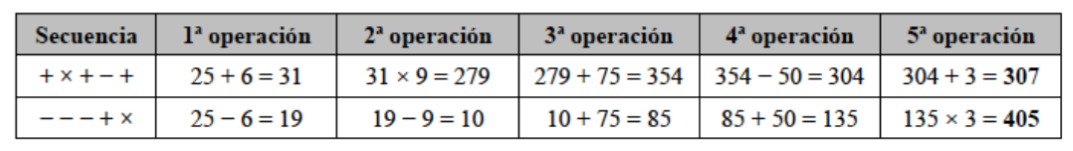

Si nuestro valor objetivo fuera el 307, la primera de las secuencias sería mejor solución que la segunda; de hecho, sería una solución óptima ya que se trata de la máxima aproximación posible. Dados los números 75, 3, 1, 4, 50, 6, 12, 8 obtener la secuencia de operadores que más aproximen el resultado de las operaciones correspondientes al valor 852.

In [ ]:
import random
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
import statistics

current_seed = random.randint(0, 1000000)
random.seed(current_seed)
np.random.seed(current_seed)
print(f"Current random seed: {current_seed}") # 741066

Current random seed: 741066


# GENERACIÓN

In [211]:
import random
from random import randint
import numpy as np

def generar_poblacion(tam_poblacion):
    """
    Genera una población inicial de individuos 
    INPUT: tam_poblacion (int): Número de individuos en la población
    OUTPUT: Lista de listas donde cada sublista representa un individuo
    """   
    # Inicializamos la población
    poblacion = []
    
    # Generamos cada individuo
    for _ in range(tam_poblacion):
        # Creamos un individuo aleatorio con índices que representan operadores ('+', '-', '*', '/')
        individuo = [randint(0, len(operadores)-1) for _ in range(len(lista_numeros) - 1)]
        poblacion.append(individuo)
        
    return poblacion

# EVALUACION

In [212]:
def score_individuo(operadores):
    """
    Aplica los operadores codificados por el individuo a la lista de numeros
    INPUT: operadores ([int]): Un individuo (Vector de operadores codificados del 0 al 3) .
    OUTPUT: Evaluacion del individuo
    
    (Devuelve None si hay una división por cero o resultado no válido.)
    """
    # Creamos un diccionario que mapea los operadores a sus funciones
    aplicar_operador = {
        0: lambda x, y: x + y,
        1: lambda x, y: x - y,
        2: lambda x, y: x * y,
        3: lambda x, y: x / y 
    }

    result = lista_numeros[0]
    for i, op in enumerate(operadores):
        try:
            result = aplicar_operador[op](result, lista_numeros[i + 1])
            if isinstance(result, complex) or result == float('inf'):
                return 10E6
        except ZeroDivisionError:
            return 10E6
    return abs(objetivo-result)

In [213]:
def evaluar_individuo(operadores):
    """
    Aplica los operadores codificados por el individuo a la lista de numeros
    INPUT: operadores ([int]): Un individuo (Vector de operadores codificados del 0 al 3) .
    OUTPUT: Evaluacion del individuo
    
    (Devuelve None si hay una división por cero o resultado no válido.)
    """
    # Creamos un diccionario que mapea los operadores a sus funciones
    aplicar_operador = {
        0: lambda x, y: x + y,
        1: lambda x, y: x - y,
        2: lambda x, y: x * y,
        3: lambda x, y: x / y 
    }

    result = lista_numeros[0]
    for i, op in enumerate(operadores):
        try:
            result = aplicar_operador[op](result, lista_numeros[i + 1])
            if isinstance(result, complex) or result == float('inf'):
                return 10E6
        except ZeroDivisionError:
            return 10E6
    return result

In [214]:
def evaluar_poblacion(poblacion):
    """
    Evalua una población dada 
    INPUT: poblacion ([[int]]): Vector de individuos.
    OUTPUT: Evaluaciones de cada individuo
    """ 
    # Inicializo vector de puntuaciones
    evaluaciones = []

    for i in poblacion:
        evaluaciones.append(score_individuo(i))

    return evaluaciones

# auxiliares

In [215]:
def individuo_to_string(ind):
    """
    Función para imprimir individuos
    """
    if len(ind) <= 20:
        str = ""
        for _ in ind:
            str += "("
        for i in range(len(ind)+len(lista_numeros)):
            if i % 2 == 0:
                if i == 0:
                    str += f"{lista_numeros[i//2]}"
                else:
                    str += f"{lista_numeros[i//2]})"
            else:
                if ind[(i-1)//2] == 0:
                    str += " + "
                elif ind[(i-1)//2] == 1:
                    str += " - "
                elif ind[(i-1)//2] == 2:
                    str += " * "
                elif ind[(i-1)//2] == 3:
                    str += " / "
        
        return str + f" = {score_individuo(ind):.0f}"
    else:
        return ind


def print_poblacion(poblacion):
    """
    Función para imprimir poblaciones
    """
    evals = evaluar_poblacion(poblacion)
    mejor = evals.index(min(evals))
    # print(f"Mejor Individuo [{mejor+1}] : {individuo_to_string(poblacion[mejor])}, score: {evals[mejor]:.2f}")
    # print("=" * 100)
    for i in range(len(poblacion)):
        print(f"Individuo {i+1}: {poblacion[i]},    score: {objetivo} - {score_individuo(poblacion[i]):.2f} = {evals[i]:.2f}")
    return

# SELECCION

In [216]:
def seleccion_torneo(poblacion, k_torneo, num_seleccionados):
    """
    Realiza selección por torneo con selección única.
    
    INPUT:
    - poblacion: lista de individuos.
    - evaluaciones: lista de fitness o score.
    - k_torneo: tamaño del grupo de torneo.
    - num_seleccionados: número de individuos a seleccionar.
    
    OUTPUT:
    - lista de individuos seleccionados únicos.
    """
    seleccionados = []
    disponibles = list(range(len(poblacion)))  # Lista de índices disponibles
    evaluaciones = evaluar_poblacion(poblacion)
    
    for _ in range(num_seleccionados):
        # Selecciona k_torneo individuos al azar de los disponibles
        indices_torneo = random.sample(disponibles, min(k_torneo, len(disponibles)))
        participantes = [poblacion[i] for i in indices_torneo]
        evaluar_torneo = [evaluaciones[i] for i in indices_torneo]
        
        # Seleccionar al mejor del torneo
        mejor_indice_local = evaluar_torneo.index(min(evaluar_torneo))
        ganador_indice = indices_torneo[mejor_indice_local]
        ganador = poblacion[ganador_indice]
        
        # Eliminar el índice seleccionado de disponibles
        disponibles.remove(ganador_indice)
        seleccionados.append(ganador)
        
    return seleccionados

In [217]:
def seleccion_deterministica(poblacion, num_seleccionados):
    seleccionados = []
    evaluaciones = evaluar_poblacion(poblacion)
    # Create pairs of (individual, evaluation)
    poblacion_evaluada = list(zip(poblacion, evaluaciones))
    # Sort by evaluation (ascending order)
    poblacion_ordenada = sorted(poblacion_evaluada, key=lambda x: x[1])
    # Select the best k individuals
    seleccionados = [ind for ind, _ in poblacion_ordenada[:num_seleccionados]]
    
    return seleccionados    

# CRUCE

In [218]:
def cruce_un_punto(padre1, padre2, prob_cruce=0.8):
    """
    Realiza un cruce de un punto entre dos individuos con una cierta probabilidad.
    INPUT:
    - padre1: primer individuo (lista de genes).
    - padre2: segundo individuo (lista de genes).
    - prob_cruce: probabilidad de realizar el cruce.
    OUTPUT:
    - hijo1, hijo2: nuevos individuos resultantes del cruce.
    """
    if random.random() < prob_cruce:
        punto_cruce = random.randint(1, len(padre1) - 1)
        hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
        hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    else:
        # Si no hay cruce, los hijos son copias de los padres
        hijo1, hijo2 = padre1.copy(), padre2.copy()
    
    return hijo1, hijo2

In [219]:
def cruce_uniforme(padre1, padre2, prob_cruce=0.8):
    """
    Realiza un cruce uniforme entre dos individuos con una cierta probabilidad.
    INPUT:
    - padre1: primer individuo (lista de genes).
    - padre2: segundo individuo (lista de genes).
    - prob_cruce: probabilidad de realizar el cruce.
    OUTPUT:
    - hijo1, hijo2: nuevos individuos resultantes del cruce.
    """
    if random.random() < prob_cruce:
        # Generar una máscara de cruce aleatoria del mismo tamaño que los padres
        mascara = [random.randint(0, 1) for _ in range(len(padre1))]
        
        # Aplicar la máscara para crear los hijos
        hijo1 = [p1 if m == 0 else p2 for p1, p2, m in zip(padre1, padre2, mascara)]
        hijo2 = [p2 if m == 0 else p1 for p1, p2, m in zip(padre1, padre2, mascara)]
    else:
        # Si no hay cruce, los hijos son copias de los padres
        hijo1, hijo2 = padre1.copy(), padre2.copy()
    
    return hijo1, hijo2

# MUTACIÓN

In [220]:
def mutar(individuo, operadores, prob_mutacion=0.1):
    """
    Realiza una mutación aleatoria en un individuo con una cierta probabilidad.
    INPUT:
    - individuo: lista de genes.
    - operadores: rango de valores posibles para los genes.
    - prob_mutacion: probabilidad de mutar cada gen.
    OUTPUT:
    - individuo mutado.
    """
    for i in range(len(individuo)):
        if random.random() < prob_mutacion:  # Mutación basada en probabilidad
            individuo[i] = random.choice([0, 1, 2, 3])
    return individuo

# SUSTITUCIÓN

In [221]:
def eliminar_peores(poblacion, n):
    """
    Elimina probabilísticamente los n individuos peor evaluados de la población.
    
    Args:
        poblacion (list): Lista de individuos en la población.
        n (int): Número de individuos a eliminar.
        
    Returns:
        list: Población después de eliminar los n individuos.
    """
    for _ in range(n):
        # Evaluar la población
        evals = evaluar_poblacion(poblacion)
        total_eval = sum(evals)
        
        # Calcular probabilidades inversas (peores evaluaciones tienen mayor probabilidad de eliminación)
        probs = [(total_eval - eval) / total_eval for eval in evals]
        
        # Seleccionar el índice del individuo a eliminar
        ind = random.choices(range(len(poblacion)), weights=probs, k=1)[0]
        
        # Eliminar al individuo seleccionado
        poblacion.pop(ind)
    
    return poblacion

# Genetic Main

In [222]:
def genetic_main(
        lista_numeros: List[int] = [ 75, 3, 1, 4, 50, 6, 12, 8], 
        objetivo: int = 852,
        operadores: List[str] = ['+', '-', '*', '/'],
        n_inicial: int = 100,
        k_torneo: int = 5,
        replacement_ratio: float = 0.5,
        max_epocas: int = 100,
        prob_cruce: float = 0.5,
        prob_mutacion: float = 0.1,
        see_last_pop: bool = True
    ) -> Tuple[List, float, List, List]:

    # Defino listas para las representaciones
    best_fitness_history = []
    average_fitness_history = [] 
    # CASO DE ERROR
    if (len(lista_numeros) < 2):
        print("Error: La lista debe tener al menos dos números.")
        return -1
    
    # Crear de población inicial
    poblacion = generar_poblacion(n_inicial)
    mejor_score = float('inf')
    mejor_solucion = None
    n_reemplazos = int(n_inicial*replacement_ratio)
    
    # n_hijos = n_inicial*Ttg # tasa de reemplazo generacional

    for i in range (max_epocas):
        # Evaluamos la poblacion actual
        evaluaciones = evaluar_poblacion(poblacion)
        
        #registrar la mejor solucion hasta el momento
        min_score = min(evaluaciones)
        if min_score < mejor_score:
            mejor_score = min_score
            mejor_solucion = poblacion[evaluaciones.index(min_score)].copy()
        
        best_fitness_history.append(mejor_score)
        average_fitness_history.append(np.mean(evaluaciones))
        
        # Criterio de parada
        if mejor_score == 0:
            break
        
        # Seleccionamos padres y generamos siguiente población
        
        padres = seleccion_torneo(poblacion, k_torneo, n_reemplazos)
        # padres = seleccion_probabilistica(poblacion, evaluaciones, num_seleccionados=n_inicial)
        # print(f'Se selenccionan {padres} de {poblacion}')
        nueva_poblacion = []
        tamaño_poblacion = n_inicial

        # Cruce
        while len(nueva_poblacion) < n_reemplazos:
            idx1, idx2 = random.sample(range(len(padres)), 2)
            padre1, padre2 = padres[idx1], padres[idx2]
            hijo1, hijo2 = cruce_un_punto(padre1, padre2, prob_cruce=prob_cruce)
            nueva_poblacion.extend([hijo1, hijo2])
            
        
        # Mutación
        nueva_poblacion = [mutar(individuo, operadores, prob_mutacion=prob_mutacion) 
                          for individuo in nueva_poblacion]
    
        # Reemplazo
        poblacion, evaluaciones = zip(*sorted(zip(poblacion, evaluaciones), key=lambda x: x[1]))
        # Mantener solo los mejores
        poblacion = list(poblacion[:(n_inicial - n_reemplazos)])
        
        # Añado los hijos a la población (volvemos al tamaño de población inicial)
        poblacion.extend(nueva_poblacion)
                
    # imprimo información de la simulación: iteraciones, mejor resultado, crossover rate, mutación rate, etc.
    if see_last_pop:
        print(f"Iteraciones: {i}")
        print(f"Mejor Individuo: {individuo_to_string(mejor_solucion)}, score: {mejor_score:.2f}")
        print("=" * 100)
    # if see_last_pop: print_poblacion(poblacion)

    
    return mejor_solucion, mejor_score, best_fitness_history, average_fitness_history

# Deterministic genetic Main

In [223]:
def condicion_parada(max_epocas, iteraciones, best_fitness_history):
    
    if iteraciones >= max_epocas:
        return False

    #si el fitness es 0, entonces paramos la simulación
    if len(best_fitness_history) > 0:
        if best_fitness_history[-1] == 0:
            return False
        
    # si los últimos 20 fitness difieren en menos de 10E9, entonces paramos la simulación
    # if len(best_fitness_history) > max_epocas/3:
    #     if abs(best_fitness_history[-1] - best_fitness_history[-int(max_epocas/3)]) < 10E-9 and abs(best_fitness_history[-1] - 1) < 10E-9*objetivo:
    #         return False
          
    return True

In [224]:
def deterministic_genetic_main(
        lista_numeros: List[int], 
        objetivo: int,
        operadores: List[str],
        n_inicial: int,
        k_torneo: int,
        replacement_ratio: float,
        max_epocas: int,
        prob_cruce: float,
        prob_mutacion: float,
        see_last_pop: bool = True
    ) -> Tuple[List, float, List, List]:
    
    # inicializamos las listas que vamos a usar para guardar los datos
    best_fitness_history = []
    average_fitness_history = [] 
    mejor_score = 0
    mejor_individuo = None
    iter = 0
    MINIMUM_POPULATION_SIZE = 2
    n_reemplazos = int(n_inicial*replacement_ratio)
    

    # CASO DE ERROR
    if (len(lista_numeros) < MINIMUM_POPULATION_SIZE) or n_inicial <= 0:
        raise ValueError("Error: La lista debe tener al menos dos números.")
    # Add validation for probability values
    if not (0 <= prob_cruce <= 1) or not (0 <= prob_mutacion <= 1):
        raise ValueError("Probabilities must be between 0 and 1")
    
    # Seleccionar aleatoriamente la población inicial
    poblacion = generar_poblacion(n_inicial)
    
    evaluaciones = evaluar_poblacion(poblacion)  

    # Hasta que se cumpla la condición de parada
    while condicion_parada(max_epocas,iter, best_fitness_history):
        iter += 1

        # encontrar el mejor individuo de la población
        evaluaciones = evaluar_poblacion(poblacion)  
        
        mejor_score = min(evaluaciones)
        mejor_individuo = poblacion[evaluaciones.index(mejor_score)].copy()        
        
        best_fitness_history.append(mejor_score)
        average_fitness_history.append(np.mean(evaluaciones))

        # Seleccionar 2M buenos individuos de la población {y1,..., y2M}
        # padres = seleccion_deterministica(poblacion, 2*n_reemplazos)
        padres = seleccion_torneo(poblacion, k_torneo, 2*n_reemplazos)

        # Para k = 1,…,M cruzar los pares (y2k-1, y2k) obteniendo los pares {z2k-1, z2k}
        hijos = []
        for i in range(n_reemplazos):
            if i + 1 < len(padres):  # Asegurar que hay suficientes padres para cruzar
                padre1, padre2 = padres[i], padres[i + 1]
                hijo1, hijo2 = cruce_un_punto(padre1, padre2, prob_cruce=prob_cruce)
                hijos.extend([hijo1, hijo2]) 
        
        # Para k = 1,…,2M mutar zk obteniendo wk. Sea Mj = {w1,…,w2M}
        hijos = [mutar(hijo, operadores, prob_mutacion=prob_mutacion) for hijo in hijos]
        
        # Seleccionar 2M malos individuos de la población Vj = {v1,..., v2M}
        eliminar_peores(poblacion, 2*n_reemplazos)
    
        poblacion += hijos
        
    mejor_score = min(best_fitness_history)
              
    # imprimo información de la simulación: iteraciones, mejor resultado, crossover rate, mutación rate, etc.
    print(f"Iteraciones: {iter}, Mejor: {mejor_score}, Cruce: {prob_cruce}, Mutación: {prob_mutacion}")
    
    #imprimo solo la última población
    if see_last_pop: print_poblacion(poblacion)
    
    return mejor_individuo, mejor_score, best_fitness_history, average_fitness_history

# PROBLEM definition

In [225]:
# Definición del problema: (Valores default)
lista_numeros =[75, 3, 1, 4, 50, 6, 12, 8] # [ 75, 3, 1, 4, 50, 6, 12, 8] # ejemplo: [25, 6, 9, 75, 50, 3, 8]
objetivo = 852 # ejemplo: 307
operadores = ['+', '-', '*', '/']

# Simulacion básica

In [226]:
n_inicial = 30
n_epocas = 100
k_torneo = 3
replacement_ratio = 0.5
prob_cruce = 0.6
prob_mutacion = 0.05

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                                     replacement_ratio, n_epocas, prob_cruce, prob_mutacion)
print("=" * 100)
print(f"{individuo_to_string(mejor)}, score: {score_individuo(mejor)}")

Iteraciones: 99
Mejor Individuo: (((((((75 * 3) + 1) / 4) + 50) * 6) + 12) + 8) = 193, score: 193.00
(((((((75 * 3) + 1) / 4) + 50) * 6) + 12) + 8) = 193, score: 193.0


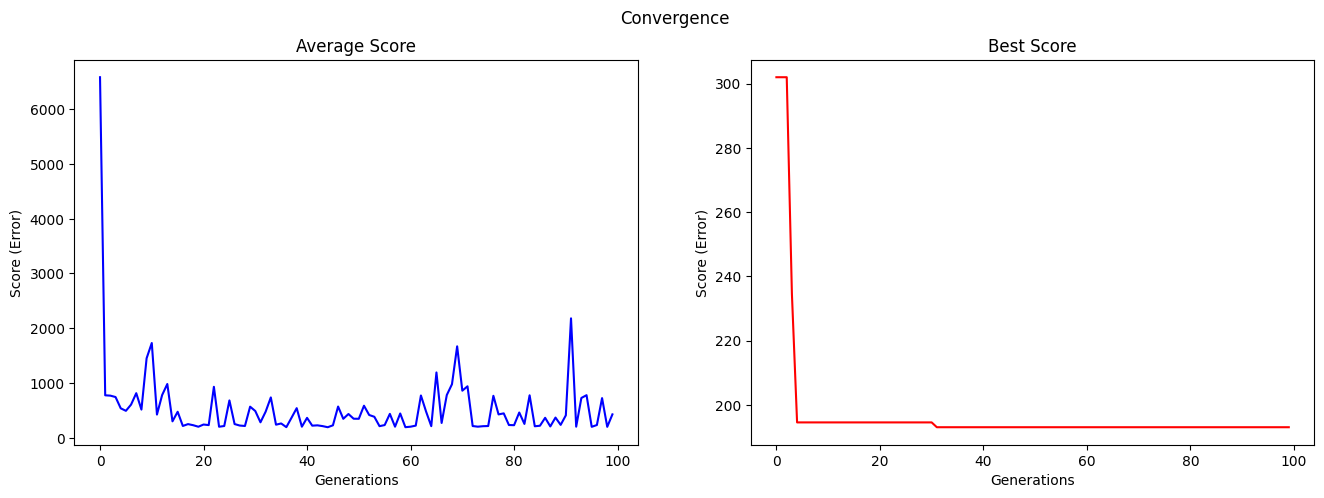

In [227]:
import matplotlib.pyplot as plt

generations_range = range(len(best_fitness_history))  # Rango de generaciones en el historial
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Error promedio
axs[0].plot(generations_range, average_fitness_history, color="blue")
axs[0].set_title("Average Score")
axs[0].set_xlabel("Generations")
axs[0].set_ylabel("Score (Error)")


# Error máximo (mejor fitness)
axs[1].plot(generations_range, best_fitness_history, color="red")
axs[1].set_title("Best Score")
axs[1].set_xlabel("Generations")
axs[1].set_ylabel("Score (Error)")

plt.suptitle(f"Convergence")
plt.show()

# Estimacion de parámetros

In [228]:
# Parámetros
n_simulaciones=20
n_inicial = 30
n_epocas = 250
k_torneo = 3
prob_cruce = 0.6
prob_mutacion = 0.05

def run_genetic_simulation(
    lista_numeros, 
    objetivo, 
    operadores, 
    n_simulaciones=20,  
    n_inicial=30, 
    n_epocas=250,
    k_torneo=3,
    replacement_ratio=0.5,
    prob_cruce=0.6,
    prob_mutacion=0.05):
    
    # Inicializar variables
    mejores_scores = []
    optimos = 0  # Contador de veces que se alcanza el óptimo
    scores_por_iteracion = []  # Historial de mejores scores por iteración

    for _ in range(n_simulaciones):
        mejor, _, best_fitness_history, _ = genetic_main(
            lista_numeros, objetivo, operadores, 
            n_inicial, k_torneo, replacement_ratio,
            n_epocas, prob_cruce, prob_mutacion, see_last_pop=False)
        
        # Evaluar el score del mejor individuo
        score = score_individuo(mejor)
        mejores_scores.append(score)
        
        # Guardar el historial del mejor fitness
        scores_por_iteracion.append(best_fitness_history)

    # Si solo hay una iteración
    if n_simulaciones == 1:
        media_mejor_score = mejores_scores[0]
        average_fitness_per_iteration = scores_por_iteracion[0]
        optimos = 1 if mejores_scores[0] == objetivo else 0
    else:
        # Calcular la media de los mejores scores
        media_mejor_score = statistics.mean(mejores_scores)
        
        # Contar cuántas veces se alcanza el mejor score histórico
        optimos = sum(1 for score in mejores_scores if score == min(mejores_scores))
        
        # Promedio de fitness por iteración
        average_fitness_per_iteration = []
        for i in range(n_epocas):
            # Get fitness scores for the current iteration from all simulations
            iteration_scores = [iter_scores[i] for iter_scores in scores_por_iteracion if i < len(iter_scores)]
            
            # Calculate the mean only if there are scores for this iteration
            if iteration_scores:  # Check if the list is not empty
                average_fitness_per_iteration.append(statistics.mean(iteration_scores))
            else:
                # If no scores for this iteration, append the last calculated average or 0 if it's the first iteration
                average_fitness_per_iteration.append(average_fitness_per_iteration[-1] if average_fitness_per_iteration else 0)

    # Gráficos (ajustados si hay solo una simulación)
    # plt.figure(figsize=(6, 3))

    # if n_simulaciones > 1:
    #     # Promedio del mejor fitness por iteración
    #     plt.plot(range(n_epocas), average_fitness_per_iteration, label="Promedio Mejor Fitness", color="blue")
    # else:
    #     # Fitness de la única simulación
    #     plt.plot(range(len(average_fitness_per_iteration)), average_fitness_per_iteration, label="Mejor Fitness", color="blue")

    # # Títulos y etiquetas
    # plt.title("Convergencia del Mejor Fitness a lo Largo de las Iteraciones")
    # plt.xlabel("Iteraciones")
    # plt.ylabel("Fitness")
    # plt.legend()
    # plt.grid()
    # plt.show()

    # # Histograma de los mejores scores (solo si hay más de una simulación)
    # if n_simulaciones > 1:
    #     plt.figure(figsize=(6, 3))
    #     plt.hist(mejores_scores, bins=20, color="orange", edgecolor="black")
    #     plt.title(f"Distribución de los Mejores Scores en {n_simulaciones} Simulaciones")
    #     plt.xlabel("Mejor Score")
    #     plt.ylabel("Frecuencia")
    #     plt.grid()
    #     plt.show()

    # Resultados en texto
    print(f"Media de mejor_score: {media_mejor_score}")
    print(f"Cantidad de veces que se alcanza el óptimo ({objetivo}): {optimos}/{n_simulaciones}")
    
    return media_mejor_score, optimos, mejores_scores, average_fitness_per_iteration

Testing combination: pop_size=50, cross_rate=0.3, mut_rate=0.05, tourn_size=2, repl_ratio=0.2
Media de mejor_score: 25.798333333333325
Cantidad de veces que se alcanza el óptimo (852): 3/20
Testing combination: pop_size=50, cross_rate=0.3, mut_rate=0.05, tourn_size=2, repl_ratio=0.4
Media de mejor_score: 18.882333333333328
Cantidad de veces que se alcanza el óptimo (852): 3/20
Testing combination: pop_size=50, cross_rate=0.3, mut_rate=0.05, tourn_size=2, repl_ratio=0.6
Media de mejor_score: 11.323999999999995
Cantidad de veces que se alcanza el óptimo (852): 4/20
Testing combination: pop_size=50, cross_rate=0.3, mut_rate=0.05, tourn_size=2, repl_ratio=0.8
Media de mejor_score: 7.038666666666654
Cantidad de veces que se alcanza el óptimo (852): 5/20
Testing combination: pop_size=50, cross_rate=0.3, mut_rate=0.05, tourn_size=3, repl_ratio=0.2
Media de mejor_score: 17.232333333333326
Cantidad de veces que se alcanza el óptimo (852): 4/20
Testing combination: pop_size=50, cross_rate=0.3, m

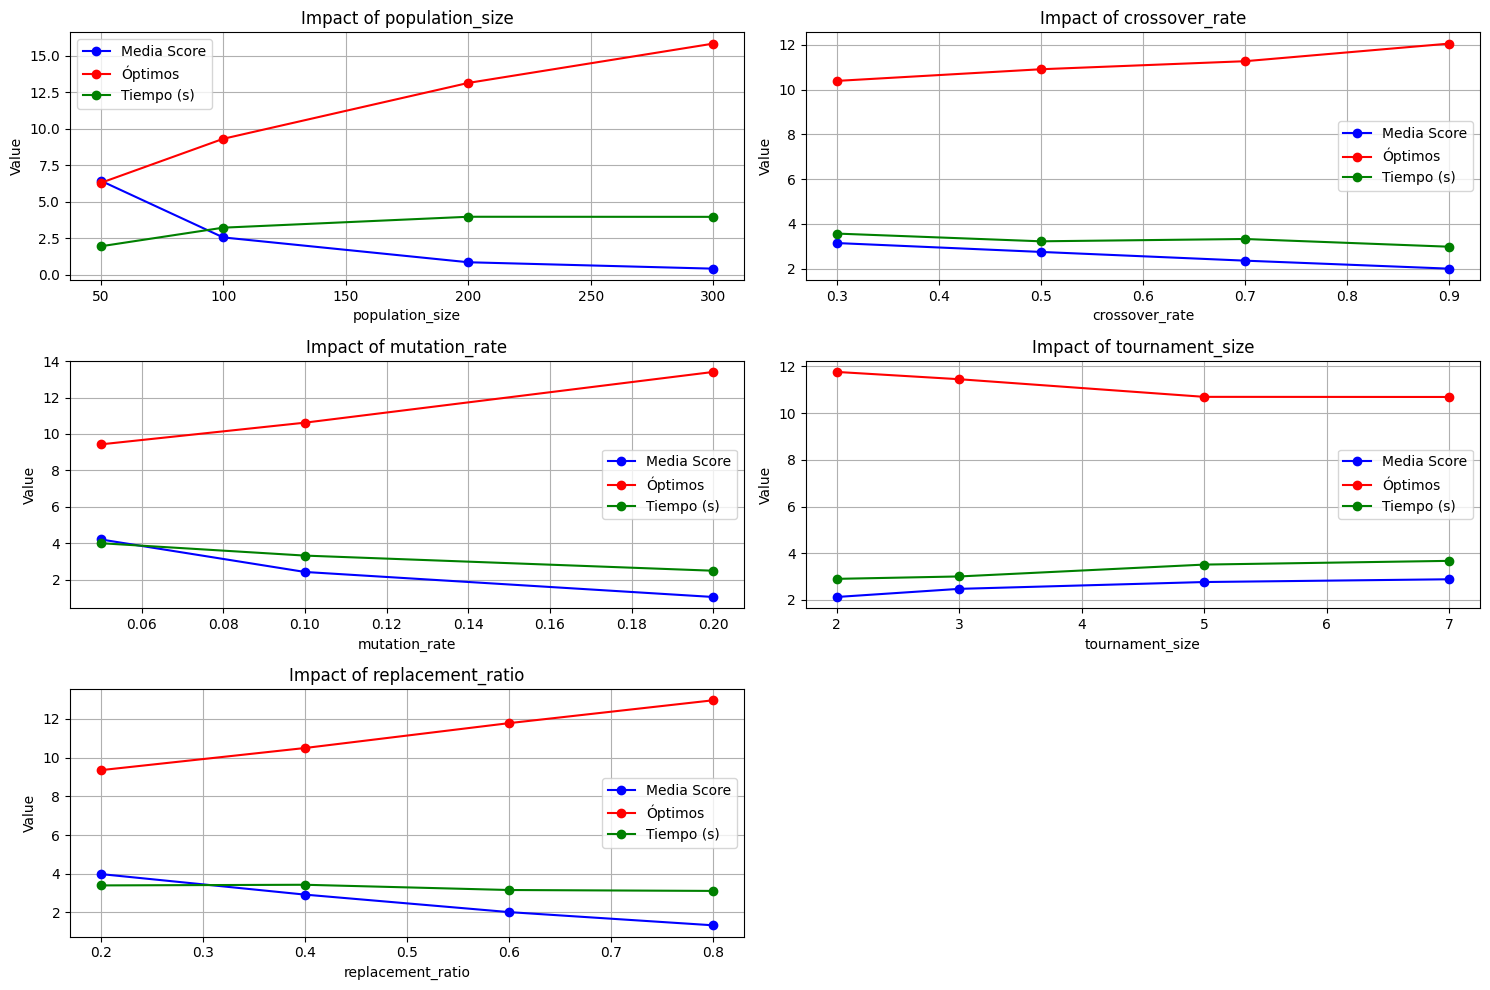

In [229]:
import time
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

# Define parameter ranges
population_sizes = [50, 100, 200, 300]
crossover_rates = [0.3, 0.5, 0.7, 0.9]
mutation_rates = [0.05, 0.1, 0.2]
tournament_sizes = [2, 3, 5, 7]
replacement_ratio = [0.2, 0.4, 0.6, 0.8]

# Almacenar resultados
results = []

# Generar todas las combinaciones posibles
param_combinations = list(product(
    population_sizes, crossover_rates, mutation_rates, tournament_sizes, replacement_ratio
))

# Iterar sobre cada combinación
for pop_size, cross_rate, mut_rate, tourn_size, repl_ratio in param_combinations:
    print("=" * 50)
    print(f"Testing combination: pop_size={pop_size}, cross_rate={cross_rate}, mut_rate={mut_rate}, "
          f"tourn_size={tourn_size}, repl_ratio={repl_ratio}")
    
    # Medir el tiempo de ejecución
    start_time = time.time()
    
    # Ejecutar la simulación genética
    media_score, n_optimos, _, _ = run_genetic_simulation(
        lista_numeros, objetivo, operadores,
        n_inicial=pop_size,
        prob_cruce=cross_rate,
        prob_mutacion=mut_rate,
        k_torneo=tourn_size,
        replacement_ratio=repl_ratio
    )
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Guardar los resultados
    results.append({
        'population_size': pop_size,
        'crossover_rate': cross_rate,
        'mutation_rate': mut_rate,
        'tournament_size': tourn_size,
        'replacement_ratio': repl_ratio,
        'media_score': media_score,
        'optimos': n_optimos,
        'time_taken': elapsed_time
    })

# Convertir resultados en DataFrame para facilitar análisis
results_df = pd.DataFrame(results)

# Mostrar la mejor configuración basada en el puntaje medio (media_score)
best_config = results_df.loc[results_df['media_score'].idxmin()]
print("\nMejor configuración encontrada:")
print(best_config)

# Gráficas para analizar resultados
plt.figure(figsize=(15, 10))

# Gráfico del impacto de cada parámetro por separado
parameters = ['population_size', 'crossover_rate', 'mutation_rate', 'tournament_size', 'replacement_ratio']

for i, param in enumerate(parameters, 1):
    plt.subplot(3, 2, i)
    param_results = results_df.groupby(param).mean()
    
    x = param_results.index
    y1 = param_results['media_score']
    y2 = param_results['optimos']
    y3 = param_results['time_taken']
    
    plt.plot(x, y1, 'b-o', label='Media Score')
    plt.plot(x, y2, 'r-o', label='Óptimos')
    plt.plot(x, y3, 'g-o', label='Tiempo (s)')
    plt.title(f'Impact of {param}')
    plt.xlabel(param)
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [230]:
from statistics import mode

# Filtrar las combinaciones con exactamente 20 óptimos
optimos_20_df = results_df[results_df['optimos'] == 20]

# Mostrar las combinaciones
print("Combinaciones que lograron 20 óptimos:")
print(optimos_20_df)

# Calcular la media y moda de cada parámetro para estas combinaciones
parameters = ['population_size', 'crossover_rate', 'mutation_rate', 'tournament_size', 'replacement_ratio']

print("\nEstadísticas para las combinaciones con 20 óptimos:")
stats = {}
for param in parameters:
    mean_value = optimos_20_df[param].mean()
    mode_value = mode(optimos_20_df[param])
    stats[param] = {'media': mean_value, 'moda': mode_value}
    print(f"{param}: Media = {mean_value:.2f}, Moda = {mode_value}")

# Opcional: almacenar las estadísticas en un DataFrame para análisis posterior
stats_df = pd.DataFrame(stats).T


Combinaciones que lograron 20 óptimos:
     population_size  crossover_rate  mutation_rate  tournament_size  \
327              100             0.7            0.2                3   
419              200             0.3            0.2                2   
471              200             0.5            0.2                3   
479              200             0.5            0.2                7   
563              200             0.9            0.2                2   
574              200             0.9            0.2                7   
575              200             0.9            0.2                7   
619              300             0.3            0.2                5   
657              300             0.5            0.2                2   
658              300             0.5            0.2                2   
659              300             0.5            0.2                2   
661              300             0.5            0.2                3   
663              300     

# Simulaciones finales

In [231]:
operadores = ['+', '-', '*', '/']
n_epocas = 1000

# Parámetros óptimos
n_inicial = 300
prob_cruce = 0.6
replacement_ratio = 0.75
k_torneo = 4
prob_mutacion = 0.2

## 1. Ejemplo enunciado

In [232]:
# Definición del problema: (Valores default)
lista_numeros = [25, 6, 9, 75, 50, 3]
objetivo = 307

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                       replacement_ratio, n_epocas, prob_cruce, prob_mutacion, see_last_pop=True)

Iteraciones: 4
Mejor Individuo: (((((25 + 6) * 9) + 75) - 50) + 3) = 0, score: 0.00


## 2. Problema Enunciado

In [233]:
# Definición del problema: (Valores default)
lista_numeros =[75, 3, 1, 4, 50, 6, 12, 8] 
objetivo = 852 

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                       replacement_ratio, n_epocas, prob_cruce, prob_mutacion, see_last_pop=True)

Iteraciones: 9
Mejor Individuo: (((((((75 * 3) + 1) * 4) - 50) - 6) + 12) - 8) = 0, score: 0.00


## 3.1 20 dimensiones

In [234]:
# Definición del problema: (Valores default)
dimensiones = 20

lista_numeros = [randint(1, 100) for _ in range(dimensiones)] # ejemplo: [25, 6, 9, 75, 50, 3, 8]
print(f"Lista_numeros: {lista_numeros}")
ind_aleatorio = [randint(0,3) for _ in range(len(lista_numeros)-1)] # ejemplo: [0, 1, 2, 3]
print(f"Objetivo: {evaluar_individuo(ind_aleatorio)}")

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                       replacement_ratio, n_epocas, prob_cruce, prob_mutacion, see_last_pop=True)

Lista_numeros: [7, 60, 55, 94, 44, 33, 67, 41, 87, 25, 88, 98, 22, 15, 25, 63, 65, 62, 85, 63]
Objetivo: 63.000000673644905
Iteraciones: 206
Mejor Individuo: (((((((((((((((((((7 / 60) / 55) / 94) / 44) / 33) / 67) / 41) / 87) / 25) / 88) + 98) * 22) - 15) * 25) + 63) + 65) - 62) + 85) / 63) = 0, score: 0.00


## 3.2 100 dimensiones

In [235]:
# Definición del problema: (Valores default)
dimensiones = 100

lista_numeros = [randint(1, 100) for _ in range(dimensiones)] # ejemplo: [25, 6, 9, 75, 50, 3, 8]
print(f"Lista_numeros: {lista_numeros}")
ind_aleatorio = [randint(0,3) for _ in range(len(lista_numeros)-1)] # ejemplo: [0, 1, 2, 3]
print(f"Objetivo: {evaluar_individuo(ind_aleatorio)}")

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                       replacement_ratio, n_epocas, prob_cruce, prob_mutacion, see_last_pop=True)

Lista_numeros: [96, 16, 87, 74, 61, 100, 89, 8, 83, 37, 85, 10, 50, 38, 53, 86, 60, 23, 40, 13, 66, 50, 31, 77, 44, 27, 94, 54, 26, 1, 47, 95, 9, 52, 6, 4, 90, 15, 54, 90, 79, 35, 86, 87, 7, 7, 59, 61, 56, 63, 48, 92, 96, 28, 24, 87, 49, 69, 71, 12, 30, 40, 99, 8, 11, 19, 50, 79, 90, 73, 80, 96, 37, 90, 36, 85, 38, 8, 73, 82, 61, 77, 45, 91, 98, 96, 29, 69, 71, 69, 2, 12, 14, 82, 51, 3, 26, 18, 83, 44]
Objetivo: 1.6115838432331357e+20
Iteraciones: 999
Mejor Individuo: [0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 3, 1, 2, 3, 1, 2, 3, 0, 1, 2, 3, 0, 3, 2, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 0, 1, 0, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 2, 0, 1, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 3, 3, 1, 1, 3, 2, 3, 2, 3, 2, 1, 3, 3, 0, 3, 2, 1, 3, 2, 0, 3, 0, 2, 3, 3, 2, 1, 1], score: 0.00


## 3.3 1000 dimensiones

In [236]:
# Definición del problema: (Valores default)
dimensiones = 1000

lista_numeros = [randint(1, 100) for _ in range(dimensiones)] # ejemplo: [25, 6, 9, 75, 50, 3, 8]
print(f"Lista_numeros: {lista_numeros}")
ind_aleatorio = [randint(0,3) for _ in range(len(lista_numeros)-1)] # ejemplo: [0, 1, 2, 3]
print(f"Objetivo: {evaluar_individuo(ind_aleatorio)}")

mejor, _, best_fitness_history, average_fitness_history = genetic_main(lista_numeros, objetivo, operadores, n_inicial, k_torneo, 
                                                                       replacement_ratio, n_epocas, prob_cruce, prob_mutacion, see_last_pop=True)

Lista_numeros: [46, 89, 6, 71, 71, 5, 99, 52, 42, 72, 82, 39, 35, 9, 88, 62, 82, 61, 27, 54, 21, 60, 44, 82, 98, 14, 14, 49, 58, 54, 57, 97, 42, 24, 1, 20, 83, 54, 46, 69, 78, 85, 34, 28, 35, 16, 92, 6, 80, 11, 40, 3, 70, 19, 67, 73, 85, 67, 94, 91, 33, 61, 41, 41, 73, 45, 14, 8, 98, 63, 12, 14, 38, 37, 16, 6, 95, 99, 32, 70, 80, 91, 57, 74, 11, 57, 80, 63, 8, 26, 35, 24, 74, 52, 90, 7, 55, 36, 30, 28, 22, 36, 15, 69, 95, 79, 10, 69, 64, 87, 87, 30, 1, 70, 92, 30, 99, 95, 48, 28, 15, 29, 24, 57, 92, 55, 54, 42, 9, 12, 47, 43, 18, 97, 32, 25, 8, 68, 53, 35, 86, 96, 25, 52, 42, 49, 54, 17, 100, 45, 7, 76, 80, 86, 70, 11, 12, 62, 56, 7, 3, 71, 71, 81, 22, 89, 16, 18, 55, 35, 11, 37, 7, 20, 68, 71, 33, 34, 16, 65, 50, 93, 64, 92, 91, 60, 8, 5, 85, 89, 43, 75, 53, 67, 90, 72, 69, 89, 75, 50, 62, 13, 37, 42, 45, 55, 98, 6, 86, 12, 38, 48, 63, 97, 35, 49, 48, 57, 30, 5, 70, 71, 90, 22, 26, 94, 24, 31, 63, 68, 11, 86, 59, 38, 7, 22, 55, 38, 53, 16, 60, 100, 18, 79, 24, 89, 91, 20, 16, 14, 19, 